In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_predict, cross_validate, GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

import shap
shap.initjs()


df_normal_quality = pd.read_csv('df_normal_quality.csv', index_col= 0).reset_index(drop = True)
y = df_normal_quality.SalePrice
X = df_normal_quality.drop(['SalePrice', 'PID'], axis =1).copy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [78]:
test = pd.DataFrame(lasso_pipe.named_steps['Preprocess'].transform(X))
test.columns = dollar_shap_values.columns
test[numerical_columns] = X[numerical_columns]
test

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
0,856,30,62.472926,7890,0.0,1,4,4,3,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1049,120,42.000000,4235,0.0,1,4,4,3,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1001,30,60.000000,6060,0.0,1,4,4,3,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1039,70,80.000000,8146,0.0,1,4,4,3,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1665,60,70.000000,8400,0.0,1,4,4,3,64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,952,30,70.105866,8854,0.0,1,4,4,3,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2329,1733,20,108.318076,13680,0.0,2,4,4,3,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2330,2002,90,82.000000,6270,0.0,1,2,4,3,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2331,1842,60,69.884162,8826,0.0,1,4,4,3,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# Lasso Tuned Model

In [68]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")               

numerical_preprocessor = RobustScaler()


preprocessor = ColumnTransformer(
    [
        ("robust_scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

lasso_pipe = Pipeline(steps=[("Preprocess", preprocessor), 
                             ("Regressor", TransformedTargetRegressor(regressor = Lasso(alpha = 0.00030615490713200075),
                                                                func =np.log, inverse_func=np.exp))])

scores = cross_val_score(lasso_pipe, X, y, cv = kf, error_score='raise')

print('score', scores.mean())
print('standard deviation', scores.std())

lasso_pipe.fit(X,y)

predictions = lasso_pipe.predict(X)
print('predicted prices', predictions)
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', mae)
mpv = predictions.mean()
print ('Mean Predicted Home Value', mpv)
mhv = y.mean()
print ('Mean  Home Value', mhv)


score 0.9508125912427354
standard deviation 0.004995823435935556
predicted prices [125415.72820466 130117.32966261 115865.46638959 ... 153059.8841348
 224552.16436075 223787.78834833]
Mean Absolute Error: 10279.979072500728
Mean Predicted Home Value 172915.18461252082
Mean  Home Value 173427.01285897984


# Feature Importance
### lasso tuned model

In [70]:
lasso_pipe.fit(X, y)

# Extracting feature importances
# Get the coefficients from the Lasso model
lasso_regressor = lasso_pipe.named_steps['Regressor'].regressor_
coefficients = lasso_regressor.coef_

# Get the feature names after preprocessing
transformed_feature_names = lasso_pipe.named_steps['Preprocess'].get_feature_names_out()

# Combine the feature names and coefficients into a DataFrame
feature_importance_lasso = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': coefficients})

# Sort the DataFrame by importance
feature_importance_lasso = feature_importance_lasso.sort_values(by='Importance', ascending=False)


feature_importance_lasso['Feature'] = feature_importance_lasso['Feature'].str.replace('robust_scaler__', '', regex=False)
feature_importance_lasso['Feature'] = feature_importance_lasso['Feature'].str.replace('one-hot-encoder__', 'OHE__', regex=False)
feature_importance_lasso.head(20)

,Feature,Importance
0,GrLivArea,0.162403
9,OverallQual,0.113802
11,YearBuilt,0.095021
75,OHE__Neighborhood_Crawfor,0.092058
93,OHE__Neighborhood_Somerst,0.057539
142,OHE__Exterior1st_BrkFace,0.051760
60,OHE__MSZoning_RL,0.043062
20,BsmtFinSF1,0.042818
10,OverallCond,0.040760
99,OHE__Condition1_Norm,0.035725


In [71]:
feature_importance_lasso.loc[feature_importance.Importance == 0]

,Feature,Importance
135,OHE__RoofMatl_Roll,0.0
160,OHE__Exterior2nd_ImStucc,-0.0
161,OHE__Exterior2nd_MetalSd,-0.0
132,OHE__RoofMatl_CompShg,-0.0
134,OHE__RoofMatl_Metal,0.0
...,...,...
103,OHE__Condition1_RRAn,0.0
126,OHE__RoofStyle_Flat,0.0
102,OHE__Condition1_RRAe,-0.0
100,OHE__Condition1_PosA,0.0


# Lasso SHAP

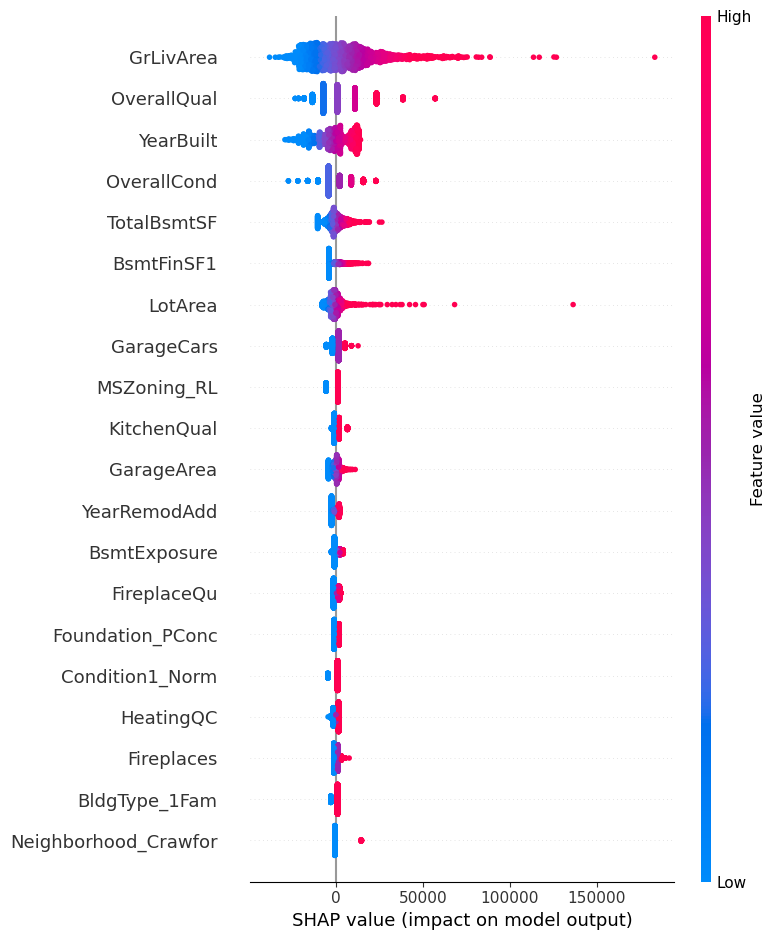

In [135]:
explainer_lasso = shap.Explainer(lasso_pipe.named_steps['Regressor'].regressor_,
                          masker = lasso_pipe.named_steps['Preprocess'].transform(X))

# Calculate SHAP values for the transformed test set
shap_values_lasso = explainer_lasso(lasso_pipe.named_steps['Preprocess'].transform(X))

# Get feature names after transformation
transformed_feature_names = lasso_pipe.named_steps['Preprocess'].get_feature_names_out()

# Convert SHAP values and transformed data to DataFrame for easier manipulation
# transform Explanation type into a df with named columns 
shap_values_df_lasso = pd.DataFrame(shap_values_lasso.values, columns=transformed_feature_names)

bv = shap_values_lasso.base_values[0]
dollar_shap_values_lasso = np.exp(bv + shap_values_df_lasso) - np.exp(bv)
    
# Get rid of prefixes
dollar_shap_values_lasso.columns = dollar_shap_values_lasso.columns.str.replace('robust_scaler__', 
                                                                    '', 
                                                                    regex=False)
dollar_shap_values_lasso.columns = dollar_shap_values_lasso.columns.str.replace('one-hot-encoder__', 
                                                                    '', 
                                                                    regex=False)

df_lasso = pd.DataFrame(lasso_pipe.named_steps['Preprocess'].transform(X))
df_lasso.columns = dollar_shap_values_lasso.columns
df_lasso[numerical_columns] = X[numerical_columns]
df_lasso
# Create a shap.Explanation with scaled shap values and correct feature names 
exp_all_lasso = shap.Explanation(dollar_shap_values_lasso.values, 
                       np.exp(shap_values_lasso.base_values),
                       df_lasso)

shap.summary_plot(exp_all_lasso)

In [136]:
dollar_shap_values.OverallCond.value_counts()

OverallCond
-4389.140576     1249
 2012.480466      458
 8680.424865      336
 15625.772336     132
-10535.075441      80
 22860.063536      37
-16435.536453      32
-22100.328045       6
-27538.863054       3
Name: count, dtype: int64

# Elastic Net Tuned

In [54]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

numerical_preprocessor = RobustScaler()

preprocessor = ColumnTransformer(
    [
        ("robust-scaler", numerical_preprocessor, numerical_columns),
        ("one-hot-encoder", categorical_preprocessor, categorical_columns),
    ]
)

en_pipe = Pipeline(steps=[("Preprocess", preprocessor), 
                             ("Regressor", TransformedTargetRegressor(regressor = ElasticNet(alpha =  0.0006921322276640134, 
                                                                                             l1_ratio= 0.4415555448483296),
                                                                func =np.log, inverse_func=np.exp))])

scores = cross_val_score(en_pipe, X, y, cv = kf, error_score='raise')

print('score', scores.mean())
print('standard deviation', scores.std())

en_pipe.fit(X,y)

predictions = en_pipe.predict(X)
print('predicted prices', predictions)
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', mae)
mpv = predictions.mean()
print ('Mean Predicted Home Value', mpv)
mhv = y.mean()
print ('Mean Home Value', mhv)

score 0.9508214083737423
standard deviation 0.004985053272069941
predicted prices [125475.81711939 130153.76501542 116515.81539284 ... 152799.98807441
 224567.63343166 223908.2101553 ]
Mean Absolute Error: 10285.25533649989
Mean Predicted Home Value 172909.30936918728
Mean Home Value 173427.01285897984


# Feature Importance
### EN Tuned Model

In [124]:
en_pipe.fit(X, y)

# Extracting feature importances
# Get the coefficients from the Lasso model
en_regressor = en_pipe.named_steps['Regressor'].regressor_
coefficients = en_regressor.coef_

# Get the feature names after preprocessing
transformed_feature_names = en_pipe.named_steps['Preprocess'].get_feature_names_out()

# Combine the feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': coefficients})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


feature_importance['Feature'] = feature_importance['Feature'].str.replace('robust_scaler__', '', regex=False)
feature_importance['Feature'] = feature_importance['Feature'].str.replace('one-hot-encoder__', 'OHE__', regex=False)
feature_importance.head(20)

,Feature,Importance
0,robust-scaler__GrLivArea,0.161166
9,robust-scaler__OverallQual,0.113950
11,robust-scaler__YearBuilt,0.094208
75,OHE__Neighborhood_Crawfor,0.090777
93,OHE__Neighborhood_Somerst,0.055874
142,OHE__Exterior1st_BrkFace,0.051185
60,OHE__MSZoning_RL,0.043555
20,robust-scaler__BsmtFinSF1,0.042657
10,robust-scaler__OverallCond,0.040708
99,OHE__Condition1_Norm,0.035453


# Elastic Net SHAP

In [115]:
explainer_en = shap.Explainer(en_pipe.named_steps['Regressor'].regressor_,
                          masker = en_pipe.named_steps['Preprocess'].transform(X))

# Calculate SHAP values for the transformed test set
shap_values_en = explainer_en(en_pipe.named_steps['Preprocess'].transform(X))

# Get feature names after transformation
transformed_feature_names = en_pipe.named_steps['Preprocess'].get_feature_names_out()

# Convert SHAP values and transformed data to DataFrame for easier manipulation
# transform Explanation type into a df with named columns 
shap_values_df_en = pd.DataFrame(shap_values_en.values, columns=transformed_feature_names)

bv = shap_values_en.base_values[0]
dollar_shap_values_en = np.exp(bv + shap_values_df_en) - np.exp(bv)
    
# Get rid of prefixes
dollar_shap_values_en.columns = dollar_shap_values_en.columns.str.replace('robust-scaler__', 
                                                                    '', 
                                                                    regex=False)
dollar_shap_values_en.columns = dollar_shap_values_en.columns.str.replace('one-hot-encoder__', 
                                                                    '', 
                                                                    regex=False)

df_en = pd.DataFrame(en_pipe.named_steps['Preprocess'].transform(X))
df_en.columns = dollar_shap_values_en.columns
df_en[numerical_columns] = X[numerical_columns]

# Create a shap.Explanation with scaled shap values and correct feature names 
exp_all_en = shap.Explanation(dollar_shap_values_en.values, 
                      np.exp(shap_values_en.base_values),
                      df_en)



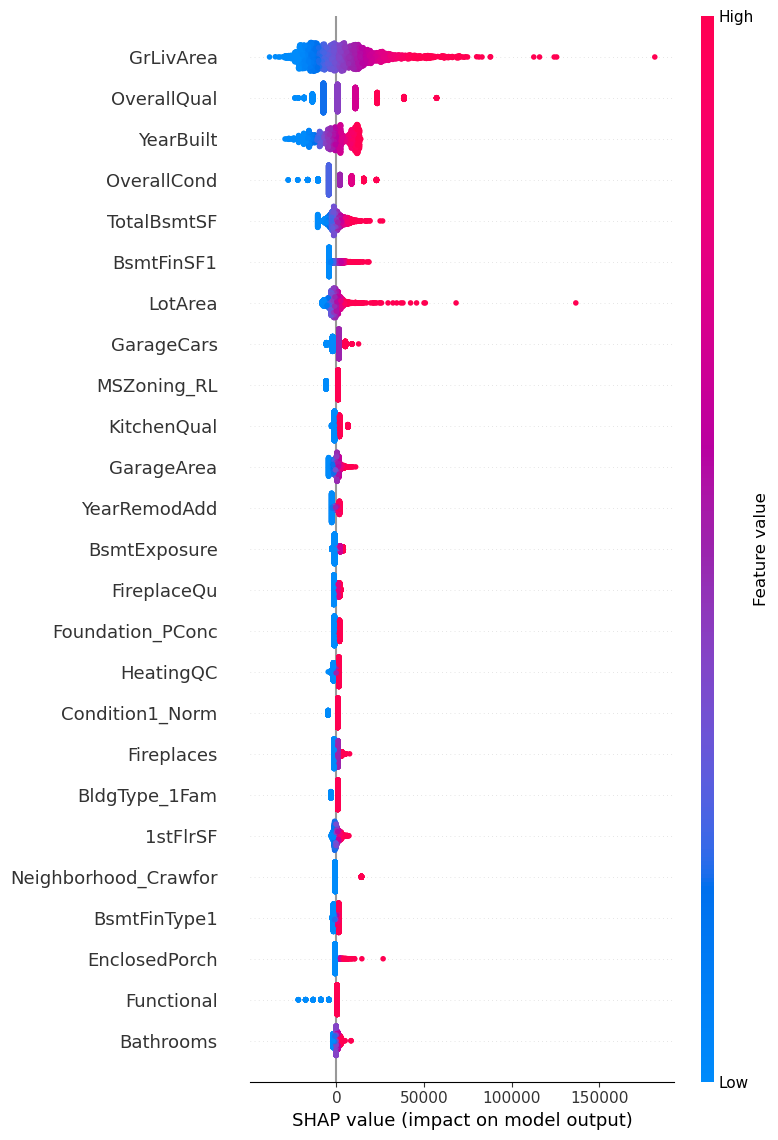

In [116]:
shap.summary_plot(exp_all_en, max_display= 25)

# XGBoost Tuned 

In [137]:
categorical_preprocessor_OHE = OneHotEncoder(handle_unknown="ignore", drop = 'first')
categorical_preprocessor_O =  OrdinalEncoder(handle_unknown="use_encoded_value", 
                                           unknown_value= -1)
numerical_preprocessor = StandardScaler()

preprocessor_OHE = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("encoder", categorical_preprocessor_OHE, categorical_columns),
    ]
)

preprocessor_O = ColumnTransformer(
    [
        ("standard_scaler", numerical_preprocessor, numerical_columns),
        ("encoder", categorical_preprocessor_O, categorical_columns),
    ]
)


xgb =  XGBRegressor(max_depth= 3,
                    learning_rate= 0.03948737640519406,
                    subsample= 0.3203617673528298,
                    colsample_bytree= 0.9678010901635519,
                    n_estimators= 1000,
                    min_child_weight= 2)

xgb_pipe_OHE = Pipeline(steps=[("Preprocess", preprocessor_OHE), ("XGB", xgb)])

xgb_pipe_O = Pipeline(steps=[("Preprocess", preprocessor_O), ("XGB", xgb)])


scores_OHE = cross_val_score(xgb_pipe_OHE, X, y, cv = kf, error_score='raise')

scores_O = cross_val_score(xgb_pipe_O, X, y, cv = kf, error_score='raise')


print('XGB OneHot')
print('score', scores_OHE.mean())
print('standard deviation', scores_OHE.std())

print('         ')
print('XGB Ordinal')
print('score', scores_O.mean())
print('standard deviation', scores_O.std())


XGB OneHot
score 0.9525701317259067
standard deviation 0.003822619024286521
         
XGB Ordinal
score 0.95184668642212
standard deviation 0.0036899392855674687


# Feature importance
### XGB tuned OneHotEncoder 

In [138]:
xgb_pipe_OHE.fit(X, y)

# Extracting feature importances
# Get the coefficients from the Lasso model
#xgb_regressor = xgb_pipe.named_steps['Regressor'].regressor_
#feature_imp = xgb_regressor.feature_importances_
feature_imp = xgb_pipe_OHE.named_steps['XGB'].feature_importances_
# Get the feature names after preprocessing
transformed_feature_names = xgb_pipe_OHE.named_steps['Preprocess'].get_feature_names_out()

# Combine the feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_imp})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


feature_importance['Feature'] = feature_importance['Feature'].str.replace('robust_scaler__', '', regex=False)
feature_importance['Feature'] = feature_importance['Feature'].str.replace('one-hot-encoder__', 'OHE__', regex=False)
feature_importance.head(25)

,Feature,Importance
9,standard_scaler__OverallQual,0.178614
41,standard_scaler__GarageCars,0.107363
14,standard_scaler__ExterQual,0.056316
54,standard_scaler__Bathrooms,0.046264
60,encoder__MSZoning_RM,0.034539
35,standard_scaler__KitchenQual,0.027540
0,standard_scaler__GrLivArea,0.026545
38,standard_scaler__Fireplaces,0.023327
42,standard_scaler__GarageArea,0.018785
24,standard_scaler__TotalBsmtSF,0.016916


In [139]:
explainer = shap.Explainer(xgb_pipe_OHE.named_steps['XGB'],
                          masker = xgb_pipe_OHE.named_steps['Preprocess'].transform(X))

# Calculate SHAP values for the transformed test set
shap_values = explainer(xgb_pipe_OHE.named_steps['Preprocess'].transform(X))

# Get feature names after transformation
transformed_feature_names = xgb_pipe_OHE.named_steps['Preprocess'].get_feature_names_out()

# Convert SHAP values and transformed data to DataFrame for easier manipulation
# transform Explanation type into a df with named columns 
shap_values_df = pd.DataFrame(shap_values.values, columns=transformed_feature_names)

    
# Get rid of prefixes
shap_values_df.columns = shap_values_df.columns.str.replace('standard_scaler__', 
                                                                    '', 
                                                                    regex=False)
shap_values_df.columns = shap_values_df.columns.str.replace('encoder__', 
                                                                    '', 
                                                                    regex=False)



 99%|===================| 2306/2333 [00:43<00:00]        

In [63]:
test = pd.DataFrame(xgb_pipe_OHE.named_steps['Preprocess'].transform(X))
test.columns = shap_values_df.columns
test[numerical_columns] = X[numerical_columns]
test

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,Fence_MnWw,Fence_NO,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD
0,856,30,62.472926,7890,0.0,1,4,4,3,36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1049,120,42.000000,4235,0.0,1,4,4,3,25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1001,30,60.000000,6060,0.0,1,4,4,3,25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1039,70,80.000000,8146,0.0,1,4,4,3,16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,60,70.000000,8400,0.0,1,4,4,3,64,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,952,30,70.105866,8854,0.0,1,4,4,3,36,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2329,1733,20,108.318076,13680,0.0,2,4,4,3,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2330,2002,90,82.000000,6270,0.0,1,2,4,3,25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2331,1842,60,69.884162,8826,0.0,1,4,4,3,49,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [140]:
shap_values_df

,GrLivArea,MSSubClass,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,...,Fence_MnWw,Fence_NO,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD
0,-17644.200602,-257.196495,-560.913148,-2177.680006,-16.201039,-273.913181,40.610711,0.0,-97.098438,-3109.733569,...,0.0,-5.487342,0.0,0.0,-3.500835,0.0,0.0,0.0,0.0,40.502454
1,-10910.425255,-179.390538,-224.742479,-10150.832872,-9.554606,-222.792264,74.256601,0.0,-80.258299,-9651.938440,...,0.0,-1.319930,0.0,0.0,-5.840216,0.0,0.0,0.0,0.0,38.656427
2,-11770.265696,62.265169,65.405140,-4383.764623,-2.012563,-172.428576,33.171180,0.0,-90.969145,-10020.975438,...,0.0,-4.722977,0.0,0.0,-3.500835,0.0,0.0,0.0,0.0,26.537997
3,-11534.322518,769.366119,752.013339,126.084240,-15.616701,-264.397095,90.408667,0.0,-77.716038,-17799.687557,...,0.0,-2.940667,0.0,0.0,-3.500835,0.0,0.0,0.0,0.0,38.513132
4,5296.295777,485.789588,813.703809,-129.230177,-7.620111,-287.945475,48.945349,0.0,-153.647614,21281.617306,...,0.0,-3.779506,0.0,0.0,-5.086788,0.0,0.0,0.0,0.0,32.763129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,-14521.825707,-409.405368,150.225055,-319.339184,-13.711207,-334.052384,43.623949,0.0,-93.300209,-4957.562924,...,0.0,-6.102448,0.0,0.0,-3.500835,0.0,0.0,0.0,0.0,25.756022
2329,8433.854327,-1183.517679,-86.135685,3359.376792,-16.120585,1106.586518,-35.401383,0.0,-127.320047,-18986.850005,...,0.0,-61.960586,0.0,0.0,-5.289558,0.0,0.0,0.0,0.0,47.857639
2330,13401.125006,-758.421953,1454.001867,-6879.253504,-15.247215,-343.211409,23.837396,0.0,-115.611623,-15003.315054,...,0.0,9.631335,0.0,0.0,-6.482274,0.0,0.0,0.0,0.0,36.536098
2331,15444.935410,754.184812,643.526351,-272.972955,-10.123527,-276.497320,32.505579,0.0,-148.110730,12967.317781,...,0.0,-0.786982,0.0,0.0,-5.701276,0.0,0.0,0.0,0.0,41.667740


In [140]:
fig = px.scatter(
    x=test.OverallQual, 
    y=shap_values_df.Neighborhood_Crawfor, 
    color = X.Neighborhood,
    labels={'x': 'GrLivArea', 'y': 'Dollar SHAP Values'},
    title='GrLivArea vs Dollar SHAP Values'
)

# Show the plot
fig.show()

In [28]:
X.loc[X.GrLivArea > 4000]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolYN,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Bathrooms
807,4316,60,RL,104.0,21535,Pave,0.0,2,4,4,...,0,0,no,0.0,NO,1,2007,WD,Normal,4.0


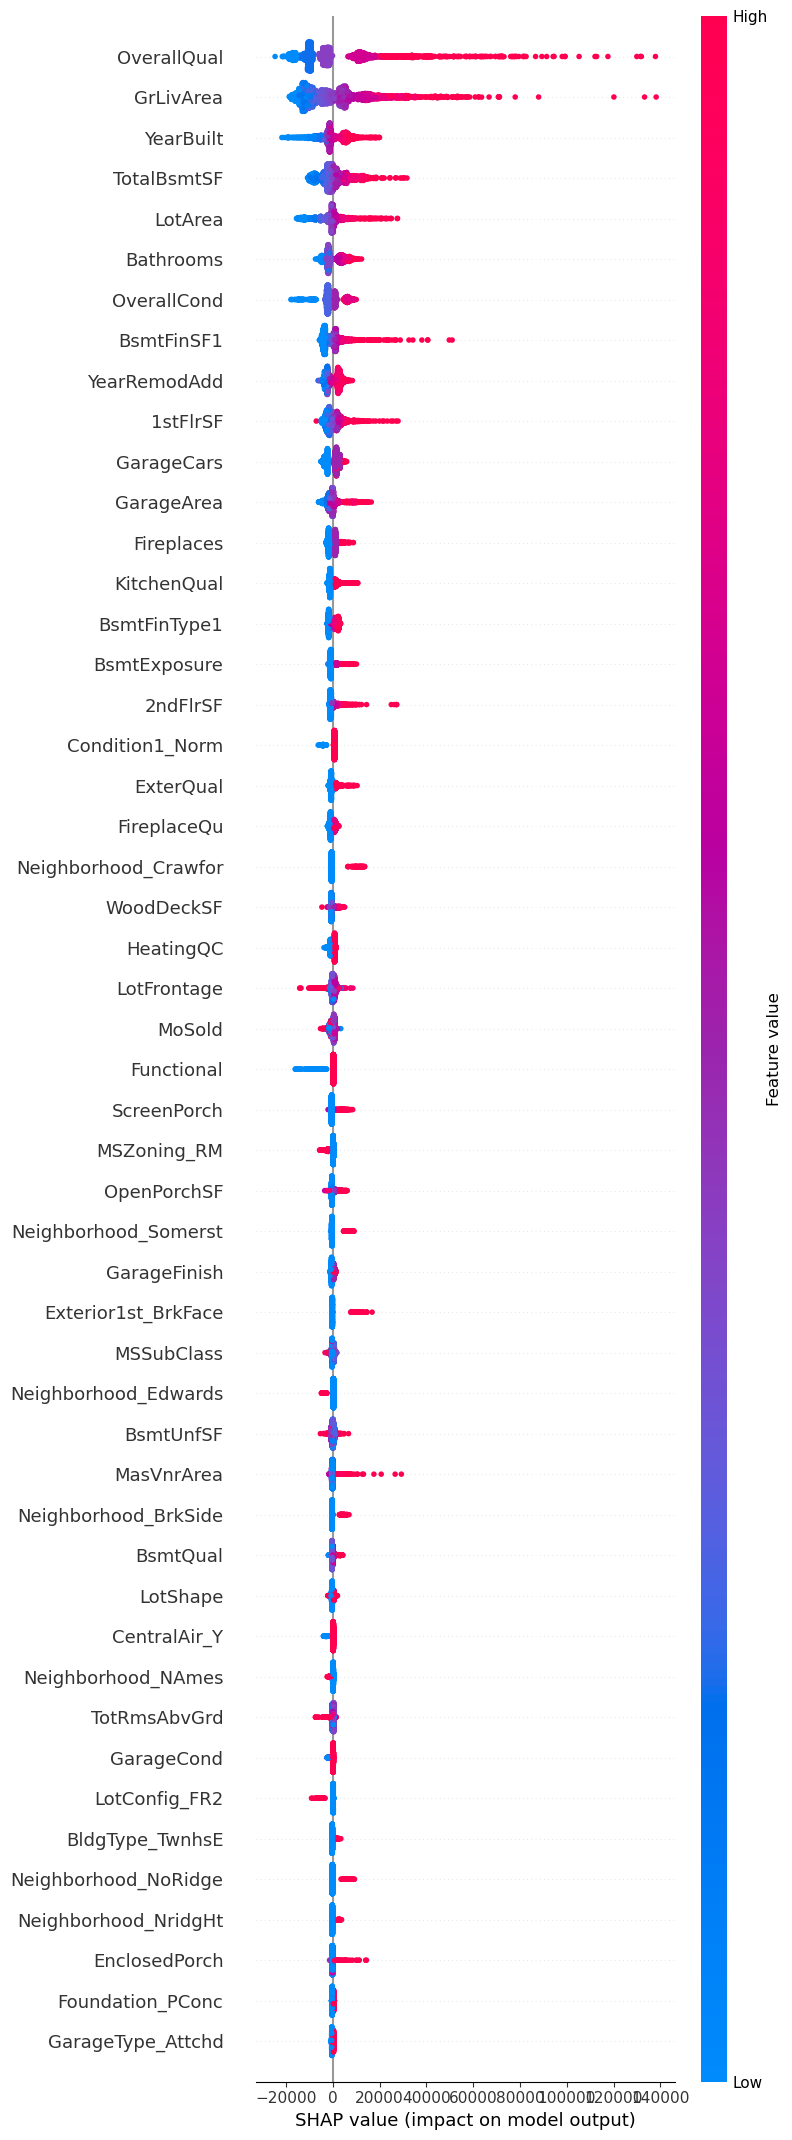

In [64]:
exp_all = shap.Explanation(shap_values_df.values, 
                           shap_values.base_values, 
                           test
                         )
shap.summary_plot(exp_all, max_display= 50)

In [ ]:
shap_values_df.

In [119]:
X.loc[X.Neighborhood== 'IDOTRR']

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolYN,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,Bathrooms
2,1001,30,C (all),60.00000,6060,Pave,0.0,1,4,4,...,86,0,no,0.0,NO,11,2007,WD,Normal,1.0
48,672,30,RM,61.00000,8534,Pave,0.0,1,1,4,...,0,0,no,0.0,GdWo,6,2006,WD,Normal,1.0
96,1355,70,RM,60.00000,6882,Pave,0.0,1,4,4,...,0,0,no,0.0,NO,3,2007,WD,Normal,1.5
99,1049,50,C (all),52.00000,5150,Pave,0.0,1,4,4,...,0,0,no,0.0,NO,5,2008,WD,Normal,1.0
135,1154,50,RM,40.00000,5436,Pave,0.0,1,4,4,...,0,0,no,0.0,MnPrv,5,2010,WD,Normal,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,1200,50,RM,58.00000,8155,Pave,0.0,1,4,4,...,0,0,no,0.0,NO,7,2008,WD,Normal,1.0
2247,816,30,RM,46.63695,5890,Pave,0.0,1,4,4,...,0,0,no,0.0,NO,6,2008,WD,Normal,1.0
2248,1969,50,RM,60.00000,6876,Pave,0.0,1,3,4,...,0,0,no,0.0,NO,11,2008,COD,Normal,2.0
2277,1090,50,RM,60.00000,6000,Pave,0.0,1,4,4,...,0,0,no,0.0,NO,7,2008,WD,Normal,1.0


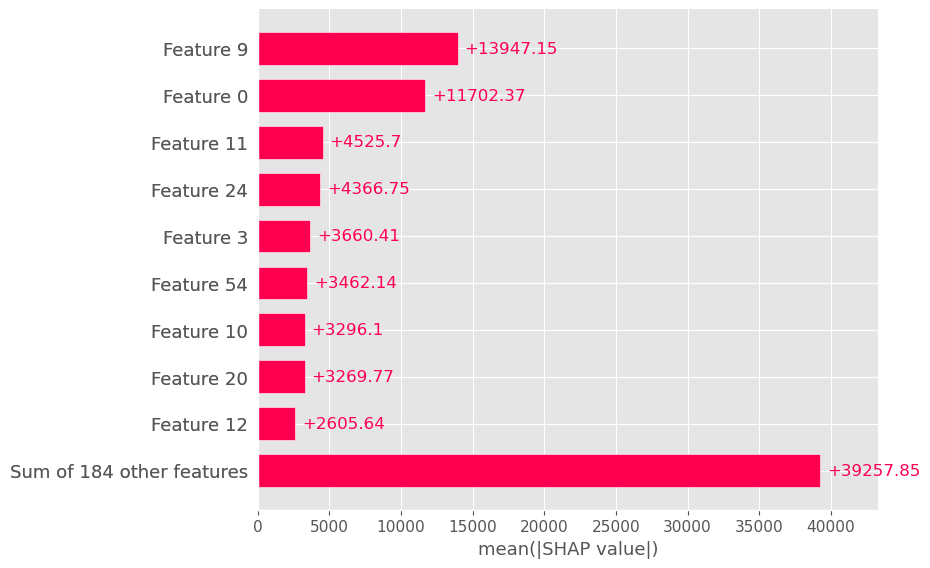

In [123]:
shap.plots.bar(exp_all)

# Feature importance
### XGB tuned OrdinalEncoder

In [151]:
xgb_pipe_O.fit(X, y)

# Extracting feature importances
# Get the coefficients from the Lasso model
#xgb_regressor = xgb_pipe.named_steps['Regressor'].regressor_
#feature_imp = xgb_regressor.feature_importances_
feature_imp = xgb_pipe_O.named_steps['XGB'].feature_importances_
# Get the feature names after preprocessing
transformed_feature_names = xgb_pipe_O.named_steps['Preprocess'].get_feature_names_out()

# Combine the feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_imp})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


feature_importance.head(20)

,Feature,Importance
9,standard_scaler__OverallQual,0.246695
41,standard_scaler__GarageCars,0.121224
54,standard_scaler__Bathrooms,0.067107
35,standard_scaler__KitchenQual,0.042398
14,standard_scaler__ExterQual,0.037956
0,standard_scaler__GrLivArea,0.032138
38,standard_scaler__Fireplaces,0.030368
72,encoder__GarageType,0.023609
24,standard_scaler__TotalBsmtSF,0.023527
44,standard_scaler__GarageCond,0.022935


# SHAP xgb ordinal

In [152]:
explainer = shap.Explainer(xgb_pipe_O.named_steps['XGB'],
                          masker = xgb_pipe_O.named_steps['Preprocess'].transform(X))

# Calculate SHAP values for the transformed test set
shap_values = explainer(xgb_pipe_O.named_steps['Preprocess'].transform(X))

# Get feature names after transformation
transformed_feature_names = xgb_pipe_O.named_steps['Preprocess'].get_feature_names_out()

# Convert SHAP values and transformed data to DataFrame for easier manipulation
# transform Explanation type into a df with named columns 
shap_values_df = pd.DataFrame(shap_values.values, columns=transformed_feature_names)

    


 98%|===================| 2286/2333 [00:48<00:00]        

In [154]:
shap_values_df.encoder__Neighborhood

0      -1105.455305
1      -2330.676031
2      -1530.767724
3      -1585.387959
4      -1086.425275
           ...     
2328    3515.747836
2329   -1676.848371
2330    3615.650434
2331     707.001055
2332   -1427.859374
Name: encoder__Neighborhood, Length: 2333, dtype: float64

In [156]:
# Get rid of prefixes
shap_values_df.columns = shap_values_df.columns.str.replace('standard_scaler__', 
                                                                    '', 
                                                                    regex=False)
shap_values_df.columns = shap_values_df.columns.str.replace('encoder__', 
                                                                    '', 
                                                                    regex=False)
shap_values_df.Neighborhood

0      -1105.455305
1      -2330.676031
2      -1530.767724
3      -1585.387959
4      -1086.425275
           ...     
2328    3515.747836
2329   -1676.848371
2330    3615.650434
2331     707.001055
2332   -1427.859374
Name: Neighborhood, Length: 2333, dtype: float64

In [23]:
color = X.Neighborhood

color_transformed = []
for word in color:
    if word == 'Crawfor':
        color_transformed.append('Crawfor')
    elif word == 'StoneBr':
        color_transformed.append('StoneBr')
    else:
        color_transformed.append('other')
        
#color = color.apply(lambda x: 'Crawfor' if x == 'Crawfor' else 'other')



AttributeError: 'list' object has no attribute 'value_counts'

In [158]:
fig = px.scatter(
    x=X.Neighborhood, 
    y=shap_values_df.Neighborhood, 
    color = np.sqrt(X.OverallQual),
    labels={'x': 'Overall Quality', 'y': 'Neighborhood SHAP Values'},
    title='Overall Quality vs Neighborhood SHAP Values'
)

# Show the plot
fig.show()

In [160]:
fig = px.scatter(
    x=np.sqrt(X.OverallQual), 
    y=shap_values_df.OverallQual, 
    labels={'x': 'Overall Quality', 'y': 'Neighborhood SHAP Values'},
    title='Overall Quality vs Neighborhood SHAP Values'
)

# Show the plot
fig.show()

In [55]:
fig = px.scatter(
    x=X.OverallQual, 
    y=shap_values_df.Neighborhood, 
    color = color_transformed,
    labels={'x': 'Overall Quality', 'y': 'Neighborhood SHAP Values'},
    title='Overall Quality vs Neighborhood SHAP Values'
) 

# Show the plot
fig.show()

In [57]:
X.loc[X.Neighborhood == 'Crawfor'].index

Index([  70,   91,  117,  128,  197,  233,  244,  304,  307,  319,  330,  356,
        383,  402,  408,  456,  635,  642,  649,  703,  742,  770,  819,  826,
        853,  918,  927,  947,  966,  996,  999, 1005, 1010, 1084, 1092, 1118,
       1156, 1175, 1176, 1184, 1190, 1192, 1193, 1270, 1299, 1330, 1341, 1385,
       1447, 1456, 1491, 1534, 1540, 1544, 1668, 1675, 1688, 1730, 1770, 1773,
       1847, 1881, 1885, 1903, 1933, 1943, 1945, 1989, 2000, 2030, 2049, 2095,
       2159, 2234, 2330],
      dtype='int64')

In [141]:
fig = px.scatter(
    x= y, 
    y= predictions, 
    color = color_transformed,
    labels={'x': 'Sale Price', 'y': 'Prdicted Sale Price'},
    title='Sale Price vs. Predicted Sale Price'
)

# Show the plot
fig.show()

# Random Forest Tuned

In [145]:
categorical_preprocessor =  OrdinalEncoder(handle_unknown="use_encoded_value", 
                                           unknown_value= -1)
numerical_preprocessor = RobustScaler()

preprocessor = ColumnTransformer(
    [
        ("scaler", numerical_preprocessor, numerical_columns),
        ("encoder", categorical_preprocessor, categorical_columns),
    ]
)

rf =  RandomForestRegressor( bootstrap = True, 
                            n_estimators = 338, 
                            max_depth = 73, 
                            min_samples_split = 4, 
                            min_samples_leaf = 2)

rf_pipe = Pipeline(steps=[("Preprocess", preprocessor), ("RF", rf)])
# rf_pipe =Pipeline(steps=[("Preprocess", preprocessor),
#                            ("Regressor", TransformedTargetRegressor(regressor = rf,
#                                func =np.log, inverse_func=np.exp))])


scores = cross_val_score(rf_pipe, X, y, cv = kf, error_score='raise')

print('score', scores.mean())
print('standard deviation', scores.std())

score 0.9168119588723982
standard deviation 0.005402006979542654


In [146]:
rf_pipe.fit(X, y)

# Extracting feature importances
# Get the coefficients from the Lasso model
#rf_regressor = rf_pipe.named_steps['Regressor'].regressor_
#feature_imp = rf_regressor.feature_importances_
feature_imp = rf_pipe.named_steps['RF'].feature_importances_
# Get the feature names after preprocessing


In [147]:
transformed_feature_names = rf_pipe.named_steps['Preprocess'].get_feature_names_out()

# Combine the feature names and coefficients into a DataFrame
feature_importance = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_imp})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


feature_importance['Feature'] = feature_importance['Feature'].str.replace('robust_scaler__', '', regex=False)
feature_importance['Feature'] = feature_importance['Feature'].str.replace('one-hot-encoder__', 'OHE__', regex=False)
feature_importance.head(20)

,Feature,Importance
9,scaler__OverallQual,0.615071
0,scaler__GrLivArea,0.076659
42,scaler__GarageArea,0.066697
54,scaler__Bathrooms,0.052240
26,scaler__1stFlrSF,0.033455
24,scaler__TotalBsmtSF,0.033283
20,scaler__BsmtFinSF1,0.017043
3,scaler__LotArea,0.012455
41,scaler__GarageCars,0.008445
11,scaler__YearBuilt,0.006755
